# 1. Introduction

- SafeTravel Inc. is one of the world's largest insurance companies specializing in travel insurance. During travel, there are a lot of risk factors - loss of baggage, airline cancellations, health issues etc.
- The potential customers are travellers who want to insure themselves against travel-related risks. They have different product offerings like 1-way travel insurance, 2-way insurance, insurance against cancellations and so on. They receive thousands of claims spread across different products
- Wrongly denying a genuine claim could lead to lawsuits against the company and approving the wrong claim would lead to a loss. Automatically predicting the claims could lead to a lot of benefits and solve some other supplementary problems too. As a team of data scientists consulting for SafeTravel Inc, you are now responsible for meeting their business outcomes.

# 2. Problem Statement

- Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

- As a Data scientist in an insurance company, you need to analyze the available data and predict whether to sanction the insurance or not.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
 
# Importing Libraries for graphical representation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path where the CSV file is stored is the path of the location where the 'dataset is stored'
travel = pd.read_csv(r'dataset.csv')
travel.head(5)

,ID,Age,Agency,Agency Type,Commision (in value),Destination,Distribution Channel,Duration,Gender,Net Sales,Product Name,Claim
0,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
1,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0
2,18233,27,EPX,Travel Agency,0.00,UNITED STATES,Online,28,NaN,13.0,Cancellation Plan,0
3,31742,36,EPX,Travel Agency,0.00,SAUDI ARABIA,Online,1,NaN,34.0,Cancellation Plan,0
4,14381,26,CWT,Travel Agency,23.76,THAILAND,Online,33,NaN,39.6,Rental Vehicle Excess Insurance,0


# 3. Basic Data Hygiene Check

In [3]:
# Checking the datatypes
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62288 entries, 0 to 62287
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    62288 non-null  int64  
 1   Age                   62288 non-null  int64  
 2   Agency                62288 non-null  object 
 3   Agency Type           62288 non-null  object 
 4   Commision (in value)  62288 non-null  float64
 5   Destination           62288 non-null  object 
 6   Distribution Channel  62288 non-null  object 
 7   Duration              62288 non-null  int64  
 8   Gender                22713 non-null  object 
 9   Net Sales             62288 non-null  float64
 10  Product Name          62288 non-null  object 
 11  Claim                 62288 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 5.7+ MB


### The dataset given consists of data corresponding to 62288 customers. Following are the features of the dataset.
- Claim - Claim status and this is the target variable
- Agency - Name of the agency
- Agency Type - Type of the travel insurance agency
- Distribution Channel - Distribution channel of the travel insurance agency
- Product Name - Name of the travel insurance product
- Duration - Duration of the travel
- Destination - Destination of the travel
- Net Sales - Amount of total sales of travel of the insurance policy
- Commision (in value) - The commision received by the travel insurance agent
- Gender - Gender of the insured person
- Age - Age of the insured person

In [4]:
# Checking the distribution of the claims 
(travel.groupby('Claim').size()/travel.shape[0]).round(4)

Claim
0    0.8
1    0.2
dtype: float64

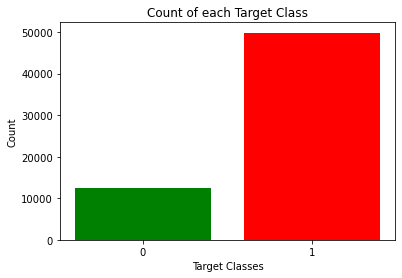

In [5]:
plt.bar(travel['Claim'].unique(), travel['Claim'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class');

In [6]:
# travel dataset has 62288 customer records and 12 features including the claim
travel.shape

(62288, 12)

In [7]:
travel.describe()

,ID,Age,Commision (in value),Duration,Net Sales,Claim
count,62288.000000,62288.000000,62288.000000,62288.000000,62288.000000,62288.000000
mean,32844.953458,39.666324,12.829703,60.958804,50.717064,0.200006
std,18065.417216,14.014652,23.498745,114.325330,63.166715,0.400008
min,0.000000,0.000000,0.000000,-2.000000,-389.000000,0.000000
25%,17579.000000,33.000000,0.000000,10.000000,20.000000,0.000000
50%,33446.500000,36.000000,1.880000,25.000000,29.700000,0.000000
75%,48532.250000,43.000000,14.440000,59.000000,58.000000,0.000000
max,63323.000000,118.000000,262.760000,4881.000000,682.000000,1.000000


In [8]:
# Checking for the null values
travel.isnull().sum()

ID                          0
Age                         0
Agency                      0
Agency Type                 0
Commision (in value)        0
Destination                 0
Distribution Channel        0
Duration                    0
Gender                  39575
Net Sales                   0
Product Name                0
Claim                       0
dtype: int64

In [9]:
# Checking the weightage of null values
((travel['Gender'].isnull().sum()/travel.shape[0])*100).round(2)

63.54

- From the above its clear that more then 60% of the data does not have Gender updated. And we also understand that there are no other features that will help us find out whether the individual is male or female. Thus we will drop this feature.

# 4. Analysis

- From the above we can say that Agency Type and Distribution Channel which has just 2 unique values and has dataype object we can use One Hot Encoding and convert them.

- We will be left with Destination, Agency and Product Name. We will deep dive into this after some analysis of the rest of the data

In [10]:
# Check for the maximum and minimum values to see if there are any invalid.
travel.describe()

,ID,Age,Commision (in value),Duration,Net Sales,Claim
count,62288.000000,62288.000000,62288.000000,62288.000000,62288.000000,62288.000000
mean,32844.953458,39.666324,12.829703,60.958804,50.717064,0.200006
std,18065.417216,14.014652,23.498745,114.325330,63.166715,0.400008
min,0.000000,0.000000,0.000000,-2.000000,-389.000000,0.000000
25%,17579.000000,33.000000,0.000000,10.000000,20.000000,0.000000
50%,33446.500000,36.000000,1.880000,25.000000,29.700000,0.000000
75%,48532.250000,43.000000,14.440000,59.000000,58.000000,0.000000
max,63323.000000,118.000000,262.760000,4881.000000,682.000000,1.000000


## 1. Age:
    - minimum: 0 which is possible.
    - maximum: 118, Way too old to travel.
   
Lets check what insurance companies say.
    
Insurance Companies do not give insurance over an age of 85. However there are few who provide insurance upto age of 99.
So giving benefit of doubt to our Safe Travel Insurance travel company we will assume that any individual upto age 99 is valid anything above that needs to be treated.

## 2. Commission: 
    - The data for commission looks valid.

## 3. Duration:
    - minimum: -2 
    - maximum: 4881
    
so now lets see what insurance companies say.
    - Duration can never be -ve. so this definately has to be computed.
    - Duration of 4881. 

Insurance companies do not give insurance over 120 days in India. Lets assume that there is an Annual plan in place then we can say that the maximum tenure of a insurance plan would be 365 days. Also given a fact that one can book a ticket 1 year in advance so we will say that the maximum duration of the insurance cannot be more than 
    - 731 days(365 + 366 days considering if it is a leap year)

Incase the proportion is less then 0.05 we will go ahead and drop the data points else we will have to treat them.


## 4. Net Sales:
    - Minimum has negative values. To check whether sales can be negative or not

lets understand how Net Sales is computed.

Net Sales = (The Value for which the insurance is sold) - (Any expenses incurred or Claim Amount paid)

So it is possible that the Sales is showing negative if the Claim amount is paid, it can also be negative even if the claim ammount is not paid incases where the insurance was sent for claim and got rejected. Now the expenses incurred for doing investigation of that claim would be more than the actual policy amount paid.

In [11]:
# Calculate % of negative Duration Travels
(travel['Duration'] < 0).sum()/travel.shape[0]*100

0.006421782686873876

In [12]:
# Calculate % of Duration beyond 731 days
(travel['Duration'] > 731).sum()/travel.shape[0]*100

0.020870793732340097

In [13]:
# Now check the weightage of Age
(travel['Age'] > 99).sum()/travel.shape[0]*100

1.4497174415617775

- Since the weightage is more than 0.05 we will not be deleting these data.
- We will replace the values that are greater than 99 with the mean of Senior Age

In [14]:
# Define the function to make age groups as children, adults, and senior
def age_convert(age):
    if age <= 21:
        result = 'Child'
    elif age <= 50:
        result = 'Adult'
    else:
        result = 'Senior'
    return result

In [15]:
# Write the function for data preprocessing
def data_pre_processing(df):
    # Add a new column in the database as Age Group
    df['Age Group'] = df['Age'].map(lambda x: age_convert(x))
    
    # Droppig feature Gender
    df.drop('Gender', axis = 1, inplace = True)
    
    # Since the minimum duration that any individual can have is 1 day thus we impute it by the column median
    df['Duration'][df['Duration'] < 0] = df['Duration'].median()
    
    # As we observed duration of any travel cannot be more 731 we will impute it as 731
    df['Duration'][df['Duration'] > 731] = 731
    
    # Replacing the values that is greater than 99 with the mean of Senior Age
    df['Age'][df['Age'] > 99] = df[df['Age Group'] == 'Senior']['Age'].mean()

In [16]:
data_pre_processing(travel)

<ipython-input-15-db42d19ecc63>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'][df['Duration'] < 0] = df['Duration'].median()
<ipython-input-15-db42d19ecc63>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'][df['Duration'] > 731] = 731
<ipython-input-15-db42d19ecc63>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][df['Age'] > 99] = df[df['Age Group'] == 'Senior']['Age'].mean()


In [17]:
travel.describe()

,ID,Age,Commision (in value),Duration,Net Sales,Claim
count,62288.000000,62288.000000,62288.000000,62288.000000,62288.000000,62288.000000
mean,32844.953458,38.904537,12.829703,60.182748,50.717064,0.200006
std,18065.417216,10.794050,23.498745,94.270276,63.166715,0.400008
min,0.000000,0.000000,0.000000,0.000000,-389.000000,0.000000
25%,17579.000000,33.000000,0.000000,10.000000,20.000000,0.000000
50%,33446.500000,36.000000,1.880000,25.000000,29.700000,0.000000
75%,48532.250000,43.000000,14.440000,59.000000,58.000000,0.000000
max,63323.000000,88.000000,262.760000,731.000000,682.000000,1.000000


In [18]:
# Creating a dataframe dropping the features with datatype object
travel_plot = travel.drop(['ID','Agency'
                           ,'Agency Type','Destination'
                           ,'Distribution Channel','Product Name'
                           ,'Claim'], axis = 1)

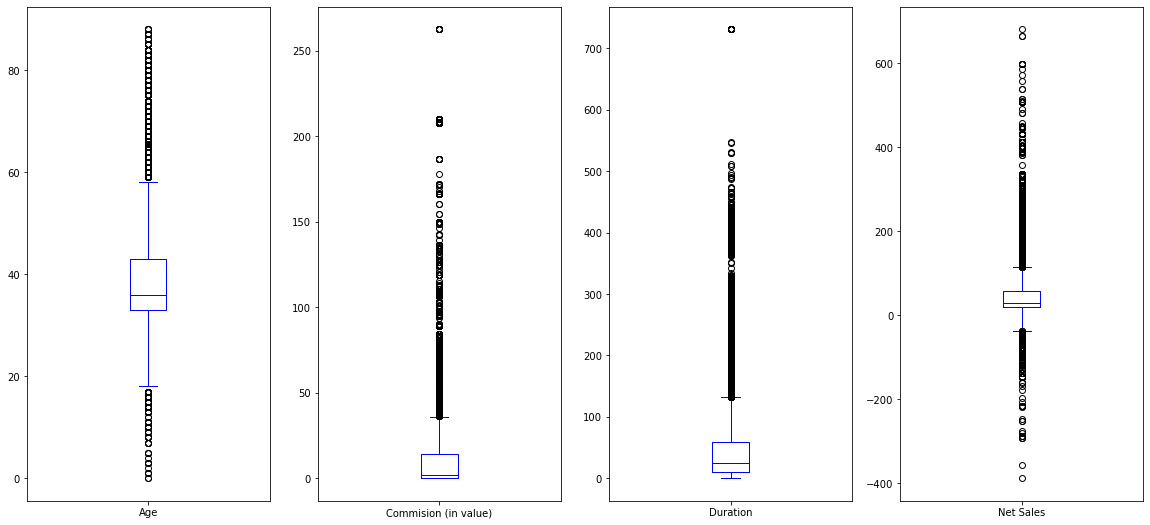

In [19]:
# box and whisker plots
travel_plot.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(20,20),color='blue')
plt.show()

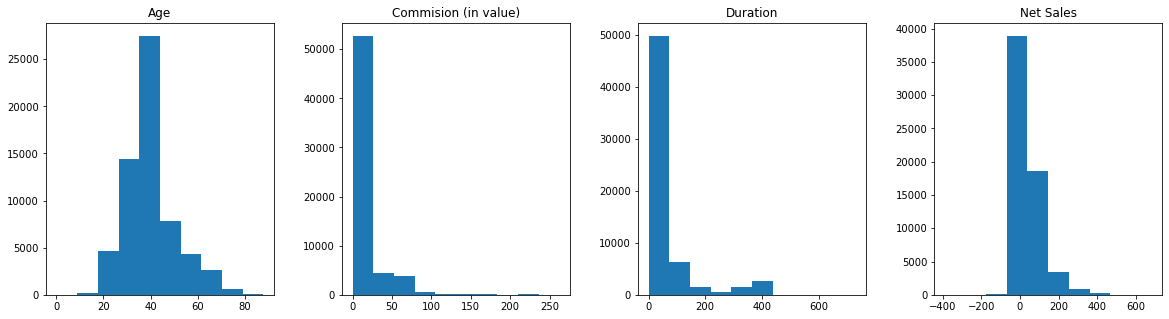

In [20]:
travel_plot.hist(grid=False,sharex=False,sharey=False,figsize=(20,5),layout=(1,4))
plt.show()

- We would not be correcting the skewness as the data is valid

In [21]:
# Finding the Agencies with the Maximum Claims
claim_mean = (travel.groupby(['Agency'])['Claim'].mean()).nlargest(10)
claim_mean

Agency
C2B    0.544827
LWC    0.467347
TTW    0.376923
KML    0.301124
CCR    0.222749
CSR    0.173333
CWT    0.145802
CBH    0.141414
SSI    0.104813
EPX    0.084498
Name: Claim, dtype: float64

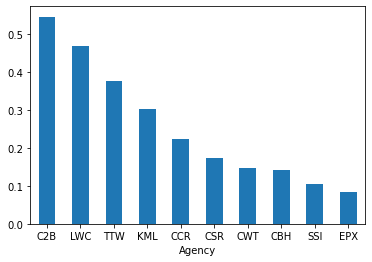

In [22]:
ax = claim_mean.plot.bar(x='Agency', y='Claim', rot=0)

In [23]:
# Finding the Agencies with most number of net sales
netsales_mean = (travel.groupby(['Agency'])['Net Sales'].mean()).nlargest(10)
netsales_mean

Agency
LWC    126.991327
C2B     98.088149
TTW     93.300000
ADM     56.184615
JWT     54.912363
KML     52.424719
CWT     47.191742
EPX     33.668716
JZI     32.747784
CSR     31.706667
Name: Net Sales, dtype: float64

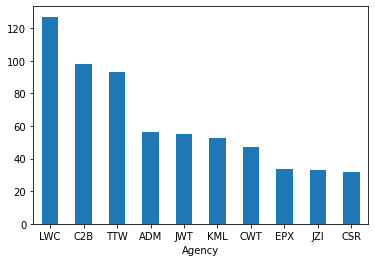

In [24]:
ax1 = netsales_mean.plot.bar(x='Agency', y='Net Sales', rot=0)

In [25]:
travel.pivot_table(index=['Agency Type'],columns=['Claim'], values=['Agency'], aggfunc='count')

Agency      
Claim              0     1
Agency Type               
Airlines       13481  7991
Travel Agency  36349  4467

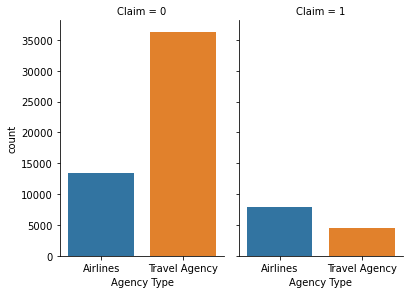

In [26]:
plot2 = sns.catplot(x="Agency Type", col="Claim",data=travel, kind="count",height=4, aspect=.7)

In [27]:
# Finding Product wise Total Net Sales
travel.pivot_table(index = ['Product Name'], values = ['Net Sales'], aggfunc = 'sum')

,Net Sales
Product Name,
1 way Comprehensive Plan,78320.00
2 way Comprehensive Plan,540984.00
24 Protect,4048.45
Annual Gold Plan,144824.70
Annual Silver Plan,720709.98
Annual Travel Protect Gold,49757.30
Annual Travel Protect Platinum,24943.40
Annual Travel Protect Silver,26372.45
Basic Plan,123388.00


In [28]:
travel.pivot_table(index = ['Age Group'], values = ['Net Sales'], aggfunc = 'sum')

,Net Sales
Age Group,
Adult,2605502.69
Child,38540.10
Senior,515021.72


In [29]:
travel.pivot_table(index = ['Age Group'], values = ['Claim'], aggfunc = 'count')

,Claim
Age Group,
Adult,52582
Child,828
Senior,8878


In [30]:
travel.groupby(['Age Group'])['Claim'].value_counts()

Age Group  Claim
Adult      0        42203
           1        10379
Child      0          605
           1          223
Senior     0         7022
           1         1856
Name: Claim, dtype: int64

C:\Users\sarora117\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 288x288 with 0 Axes>

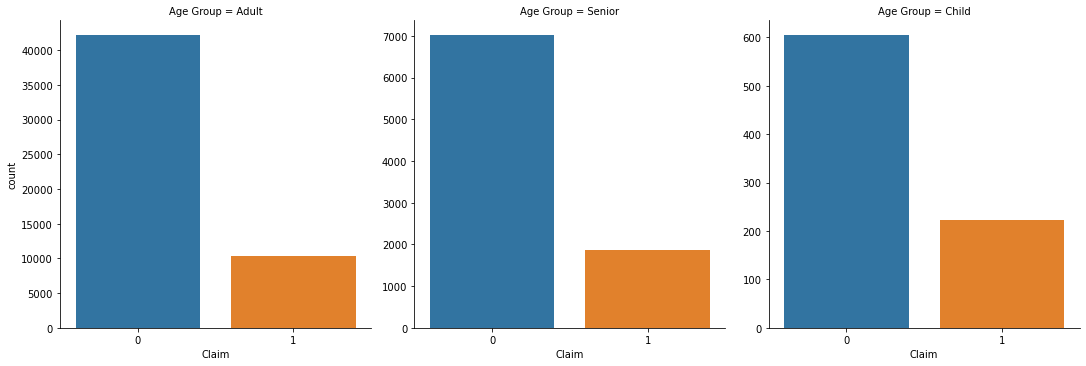

In [31]:
fig = plt.figure(figsize = (4,4))
sns.catplot('Claim', col = 'Age Group', data = travel, col_wrap =3, kind='count',sharey=False)

In [32]:
# Converting all Destination to sensible numbers (Risk of default - inspired by WOE)
travel['Destination_risk'] = travel.groupby('Destination')['Claim'].transform('mean')
print(travel['Destination_risk'].unique())

[0.42790515 0.05265724 0.20653907 0.         0.09133037 0.15590009
 0.098678   0.1371376  0.15806716 0.230563   0.25347222 0.10053763
 0.06189631 0.06793842 0.04663487 0.04491726 0.23217923 0.10895212
 0.34146341 0.24795082 0.12285012 0.13328424 0.11316872 0.03647416
 0.1754386  0.14736842 0.26865672 0.02086438 0.26190476 0.12222222
 0.09883103 0.07801418 0.06666667 0.2804878  0.21276596 0.1097561
 0.17142857 0.275      0.08955224 0.75       0.44444444]


In [33]:
def Country_Categories(value):
    if(value >= 0.3):
        result = '(1) High Risk - More than 30% Claimed'
    elif(value >= 0.2):
        result = '(2) Medium Risk - More than 20% Claimed'
    elif(value > 0):
        result = '(3) Low Risk - More than 1% Claimed'
    else:
        result = '(4) No Risk Countries'
    return result

In [34]:
travel['Risk of Countries'] = travel['Destination_risk'].map(lambda x: Country_Categories(x))
print(travel['Risk of Countries'].unique())

['(1) High Risk - More than 30% Claimed'
 '(3) Low Risk - More than 1% Claimed'
 '(2) Medium Risk - More than 20% Claimed' '(4) No Risk Countries']


In [35]:
travel.head(5)

,ID,Age,Agency,Agency Type,Commision (in value),Destination,Distribution Channel,Duration,Net Sales,Product Name,Claim,Age Group,Destination_risk,Risk of Countries
0,45341,28.0,C2B,Airlines,28.13,SINGAPORE,Online,34,112.5,Silver Plan,1,Adult,0.427905,(1) High Risk - More than 30% Claimed
1,12958,37.0,JZI,Airlines,12.95,PHILIPPINES,Online,53,37.0,Basic Plan,0,Adult,0.052657,(3) Low Risk - More than 1% Claimed
2,18233,27.0,EPX,Travel Agency,0.00,UNITED STATES,Online,28,13.0,Cancellation Plan,0,Adult,0.206539,(2) Medium Risk - More than 20% Claimed
3,31742,36.0,EPX,Travel Agency,0.00,SAUDI ARABIA,Online,1,34.0,Cancellation Plan,0,Adult,0.000000,(4) No Risk Countries
4,14381,26.0,CWT,Travel Agency,23.76,THAILAND,Online,33,39.6,Rental Vehicle Excess Insurance,0,Adult,0.091330,(3) Low Risk - More than 1% Claimed


# 5. Feature Engineering

In [36]:
def feature_processing(df):
    # Converting all categorical columns into numeric using frequency encoding and one-hot encoding
    fe = df.groupby('Destination').size()/len(df)
    df.loc[:,'Dest_fe'] = df['Destination'].map(fe)
    
    fe_1 = df.groupby('Agency').size()/len(df)
    df.loc[:,'Agency_fe'] = df['Agency'].map(fe_1)
    
    fe_2 = df.groupby('Product Name').size()/len(df)    
    df.loc[:,'Product Name_fe'] = df['Product Name'].map(fe_2)
    
    df.drop(columns='Agency',axis=1,inplace=True)
    df.drop(columns='Destination',axis=1,inplace=True)
    df.drop(columns='Product Name',axis=1,inplace=True)
    df.drop(columns='Age Group',axis=1,inplace=True)

In [37]:
feature_processing(travel)

In [38]:
travel.head()

,ID,Age,Agency Type,Commision (in value),Distribution Channel,Duration,Net Sales,Claim,Destination_risk,Risk of Countries,Dest_fe,Agency_fe,Product Name_fe
0,45341,28.0,Airlines,28.13,Online,34,112.5,1,0.427905,(1) High Risk - More than 30% Claimed,0.285705,0.218469,0.058535
1,12958,37.0,Airlines,12.95,Online,53,37.0,0,0.052657,(3) Low Risk - More than 1% Claimed,0.032928,0.086951,0.074894
2,18233,27.0,Travel Agency,0.00,Online,28,13.0,0,0.206539,(2) Medium Risk - More than 20% Claimed,0.040265,0.488296,0.246500
3,31742,36.0,Travel Agency,0.00,Online,1,34.0,0,0.000000,(4) No Risk Countries,0.000819,0.488296,0.246500
4,14381,26.0,Travel Agency,23.76,Online,33,39.6,0,0.091330,(3) Low Risk - More than 1% Claimed,0.083146,0.127729,0.127729


In [39]:
travel.drop(columns=['Risk of Countries', 'Destination_risk'],axis=1,inplace=True)

In [40]:
travel = pd.get_dummies(travel, columns=['Agency Type','Distribution Channel'], drop_first=True)

In [41]:
travel.head(5)

,ID,Age,Commision (in value),Duration,Net Sales,Claim,Dest_fe,Agency_fe,Product Name_fe,Agency Type_Travel Agency,Distribution Channel_Online
0,45341,28.0,28.13,34,112.5,1,0.285705,0.218469,0.058535,0,1
1,12958,37.0,12.95,53,37.0,0,0.032928,0.086951,0.074894,0,1
2,18233,27.0,0.00,28,13.0,0,0.040265,0.488296,0.246500,1,1
3,31742,36.0,0.00,1,34.0,0,0.000819,0.488296,0.246500,1,1
4,14381,26.0,23.76,33,39.6,0,0.083146,0.127729,0.127729,1,1


# 6. Preparing and training a baseline model.

In [42]:
X = travel.drop('Claim', axis = 1)
Y = travel['Claim']

In [43]:
# Multi colinearity detection
def plot_heatmap(df, fig_size=(10, 7)):
    fig = plt.figure(figsize=fig_size)
    sns.heatmap(df.corr(), annot=True)
    plt.title('Heatmap for detecting multicollinearity', fontsize=16, color='navy')
    plt.show()

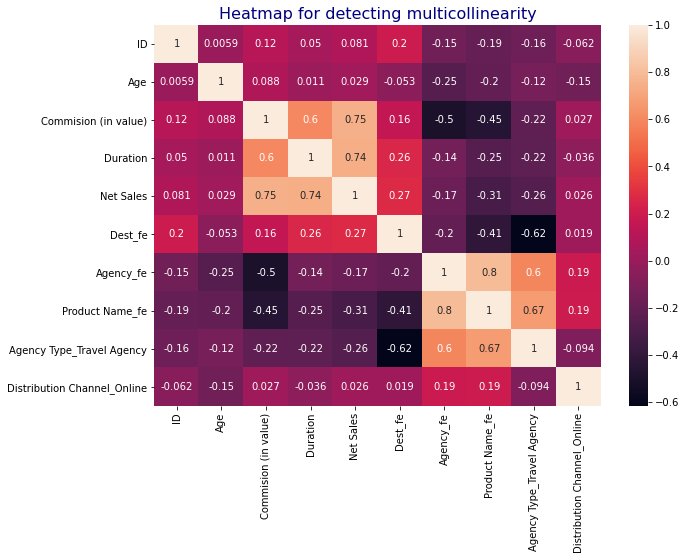

In [44]:
plot_heatmap(X)

- From the above heat-map we can see that there is not a high co-relation between any features and hence we can continue with all of the above features to train our model.

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.7, random_state = 7)

# 7. Modeling

### Model 1: Logistic Regression

In [47]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [48]:
logr = LogisticRegression()
logr.fit(X_train,Y_train)
Y_pred = logr.predict(X_test)

In [49]:
print(accuracy_score(Y_test, Y_pred))

0.8174131749344464


In [50]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90     14972
           1       0.63      0.19      0.29      3715

    accuracy                           0.82     18687
   macro avg       0.73      0.58      0.59     18687
weighted avg       0.79      0.82      0.78     18687



In [51]:
print(roc_auc_score(Y_test,Y_pred))

0.5822700894518579


In [52]:
print(confusion_matrix(Y_test,Y_pred))

[[14562   410]
 [ 3002   713]]


### Model 2: Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

In [55]:
print(accuracy_score(Y_test, Y_pred_rf))

0.9946486862524749


In [56]:
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14972
           1       0.97      1.00      0.99      3715

    accuracy                           0.99     18687
   macro avg       0.99      1.00      0.99     18687
weighted avg       0.99      0.99      0.99     18687



In [57]:
print(roc_auc_score(Y_test,Y_pred_rf))

0.9966604328079082


In [58]:
print(confusion_matrix(Y_test,Y_pred_rf))

[[14872   100]
 [    0  3715]]


### Model 3: Applying KNN Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)

In [61]:
print(accuracy_score(Y_test, Y_pred_knn))

0.9618451329801466


In [62]:
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     14972
           1       0.84      1.00      0.91      3715

    accuracy                           0.96     18687
   macro avg       0.92      0.98      0.94     18687
weighted avg       0.97      0.96      0.96     18687



In [63]:
print(roc_auc_score(Y_test,Y_pred_knn))

0.9755817229397972


In [64]:
print(confusion_matrix(Y_test,Y_pred_knn))

[[14265   707]
 [    6  3709]]


### Model 4: Applying SVM

In [65]:
from sklearn.svm import SVC

In [66]:
clf = SVC(kernel='linear')
clf.fit(X_train,Y_train)
Y_pred_svm = clf.predict(X_test)

In [67]:
print(accuracy_score(Y_test, Y_pred_knn))

0.9618451329801466


In [68]:
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     14972
           1       0.84      1.00      0.91      3715

    accuracy                           0.96     18687
   macro avg       0.92      0.98      0.94     18687
weighted avg       0.97      0.96      0.96     18687



In [69]:
print(roc_auc_score(Y_test,Y_pred_knn))

0.9755817229397972


In [70]:
print(confusion_matrix(Y_test,Y_pred_knn))

[[14265   707]
 [    6  3709]]


### Model 5: Decision tree with hyperparameters optimized

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [72]:
dtc = DecisionTreeClassifier(random_state=42)

In [73]:
params = {"criterion":["gini", "entropy"], 
         "max_depth":np.arange(4,8,1), 
         "min_samples_split":np.arange(0.05, 0.08, 0.01)}
dtc_cv = GridSearchCV(dtc, param_grid=params, cv = 10)
dtc_cv.fit(X_train,Y_train)
Y_pred_dt = dtc_cv.best_estimator_.predict(X_test)
print (dtc_cv.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 0.05}


In [74]:
print(accuracy_score(Y_test, Y_pred_dt))

0.8404773371862793


In [75]:
print(classification_report(Y_test, Y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     14972
           1       0.62      0.50      0.55      3715

    accuracy                           0.84     18687
   macro avg       0.75      0.71      0.73     18687
weighted avg       0.83      0.84      0.83     18687



In [76]:
print(roc_auc_score(Y_test,Y_pred_dt))

0.7125305595118965


In [77]:
print(confusion_matrix(Y_test,Y_pred_dt))

[[13848  1124]
 [ 1857  1858]]


# Conclusion -

- MODEL TO BE SELECT IS WITH THE HIGHEST PRECISION SCORE :- Random Forest
- In the above project we used Machine Learning to predict whether a person would claim his/her travel insurance.
- A fair amount of exploratory data analysis has also been done on the dataset which helped us gain various insights on the given data and helped us in feature engineering.
- More emphasis on feature selection can be done further down the road but I stopped at the baseline as the results for precision and recall were pretty good. 